Information about data:

                     ->We have the amazon reviews dataset from kaggle
                     
                     ->Reviews are given for the product
                     
                     ->The features of the data were:
                     
                           Id
                           
                           ProductId- unique identifier for the product
                           
                           UserId- unqiue identifier for the user
                           
                           ProfileName
                           
                           HelpfullnessNumerator- number of users who found the review helpful
                           
                           HelpfulnessDenominator- number of users who indicated whether they found the review 
                                                   helpful or not
                           
                           Score-rating between 1 and 5
                           
                           Time-timestamp for the review
                           
                           Summary- brief summary of the review
                           
                           Text- text of the review
                       
                     -> Based on the score of the review we review we classify them into positive and negative
                     
                     Number of reviews: 568,454

                     
                    
                     
                  

objective:

    -> Cleaning the dataset by classifying them into positive and negative reviews based on the 
      rating provided and removing the duplicates
      
    -> Converting the text data to vectors by using word2vec,Average word2vec
    
    -> Applying the following Ensemble Models:
       
                         -> Random Forests
                         
                         -> Gradient Boost Decision Trees
                         
                         -> stacking

Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as s
import sqlite3
import nltk
import string
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier

->loading the data and information about the data

-> Shape of the data

-> Dimensionality of the data

-> Attributes if the data

In [2]:
con = sqlite3.connect("database.sqlite")
data = pd.read_sql_query("SELECT * FROM Reviews WHERE Score != 3",con)
print(data.shape)
print(data.ndim)
print(data.columns)

(525814, 10)
2
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


Removing the Duplicates from the data

In [3]:
####function to categorise rating into positive and negatives
def change(n):
    if n>3:
        return 'positive'
    return 'negative'

rating = data['Score']    
####take the ratings
rating = rating.map(change)  
#####apply function change on ratings column
data['Score'] = rating    
####updating the column with positive and negatives
data.head(6)          
##### head with first 6 elements in data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,positive,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...


Data Cleaning:Removing Duplicates

In [4]:
user = pd.read_sql_query("""SELECT * FROM Reviews WHERE UserId= "AR5J8UI46CURR" ORDER BY ProductId """,con)
print(user)

       Id   ProductId         UserId      ProfileName  HelpfulnessNumerator  \
0   78445  B000HDL1RQ  AR5J8UI46CURR  Geetha Krishnan                     2   
1  138317  B000HDOPYC  AR5J8UI46CURR  Geetha Krishnan                     2   
2  138277  B000HDOPYM  AR5J8UI46CURR  Geetha Krishnan                     2   
3   73791  B000HDOPZG  AR5J8UI46CURR  Geetha Krishnan                     2   
4  155049  B000PAQ75C  AR5J8UI46CURR  Geetha Krishnan                     2   

   HelpfulnessDenominator  Score        Time  \
0                       2      5  1199577600   
1                       2      5  1199577600   
2                       2      5  1199577600   
3                       2      5  1199577600   
4                       2      5  1199577600   

                             Summary  \
0  LOACKER QUADRATINI VANILLA WAFERS   
1  LOACKER QUADRATINI VANILLA WAFERS   
2  LOACKER QUADRATINI VANILLA WAFERS   
3  LOACKER QUADRATINI VANILLA WAFERS   
4  LOACKER QUADRATINI VANILLA WAFERS

Observation:
    
    -> Here we can see that for the same time span we got five reviews, practically which is not possible
    
    ->This happened because when the user given review for a product it is applied to all the flavors of the product

In [5]:
sorteddata = data.sort_values('ProductId',axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last')
finaldata = sorteddata.drop_duplicates(subset={"UserId","ProfileName","Time","Text"},keep='first',inplace=False)

Information about the modified data:

    -> Shape of the data

    -> Dimensionality of the data

    -> Attributes if the data

    -> Sample of modified data

In [6]:
print(finaldata.shape)
print(finaldata.ndim)
print(finaldata.columns)
print(finaldata.head(5))

(364173, 10)
2
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
            Id   ProductId          UserId                  ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL              shari zychinski   
138688  150506  0006641040  A2IW4PEEKO2R0U                        Tracy   
138689  150507  0006641040  A1S4A3IQ2MU7V4        sally sue "sally sue"   
138690  150508  0006641040     AZGXZ2UUK6X  Catherine Hallberg "(Kate)"   
138691  150509  0006641040  A3CMRKGE0P909G                       Teresa   

        HelpfulnessNumerator  HelpfulnessDenominator     Score        Time  \
138706                     0                       0  positive   939340800   
138688                     1                       1  positive  1194739200   
138689                     1                       1  positive  1191456000   
138690                     1                       1  p

CONSTRUCTING VECTOR REPRESENTATION OF EACH IN THE DATA BY USING WORD2VEC

In [7]:
import gensim
from gensim.models import word2vec

-> Importing the required libraries

-> Functions to clean the sentences

-> Constructing the word2vec from the sample subset data

In [8]:
import re
def cleanhtml(sentence):
    clean = re.compile("<.*?>")
    cleantext = re.sub(clean," ",sentence)
    return cleantext
def cleanpunct(sentence):
    cleanr = re.sub(r"[?|!|\|'|#|.|,|)|(|/]",r' ',sentence)
    return cleanr

In [9]:
sorted_w2vec = finaldata.sort_values("Time",axis=0,ascending=True,kind='quicksort',na_position='last',inplace=False)

Information about the sorted data:

    -> Shape of the data

    -> Dimensionality of the data

    -> Attributes if the data

    -> Sample of modified data

In [10]:
print(sorted_w2vec.shape)
print(sorted_w2vec.ndim)
print(sorted_w2vec.columns)
print(sorted_w2vec.head(5))

(364173, 10)
2
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')
            Id   ProductId          UserId               ProfileName  \
138706  150524  0006641040   ACITT7DI6IDDL           shari zychinski   
138683  150501  0006641040   AJ46FKXOVC7NR        Nicholas A Mesiano   
417839  451856  B00004CXX9   AIUWLEQ1ADEG5          Elizabeth Medina   
346055  374359  B00004CI84  A344SMIA5JECGM           Vincent P. Ross   
417838  451855  B00004CXX9   AJH6LUC1UT1ON  The Phantom of the Opera   

        HelpfulnessNumerator  HelpfulnessDenominator     Score       Time  \
138706                     0                       0  positive  939340800   
138683                     2                       2  positive  940809600   
417839                     0                       0  positive  944092800   
346055                     1                       2  positive  944438400   


In [11]:
i=0
sentences_list=[]
for sent in sorted_w2vec['Text'].values:
    filtered_sentences = []
    sent = cleanhtml(sent)
    for w in sent.split():
        for cleanedwords in cleanpunct(w).split():
            if(cleanedwords.isalpha()):
                filtered_sentences.append(cleanedwords.lower())
    sentences_list.append(filtered_sentences)   

In [12]:
print(len(sentences_list))
print(type(sentences_list))

364173
<class 'list'>


In [13]:
w2vmodel = gensim.models.Word2Vec(sentences_list,min_count=4,size=200,workers=4)

-> Most similar word

-> Similarity between the words

-> Dimensionality representation of a word

In [14]:
print(w2vmodel.most_similar("where"))
print(w2vmodel.similarity("where",'when'))
print(w2vmodel.wv['what'])

[('wherever', 0.46529310941696167), ('what', 0.4458898901939392), ('everywhere', 0.43889546394348145), ('when', 0.4215936064720154), ('anywhere', 0.417721152305603), ('somewhere', 0.41519832611083984), ('florida', 0.40275052189826965), ('tx', 0.39854639768600464), ('why', 0.3969125747680664), ('socal', 0.3944746255874634)]
0.42159361544755236
[ 0.7996897   3.085431    1.340987   -2.8525755   2.5451179  -1.5701782
  2.9685671  -2.174922    2.0419028  -1.5547013   0.5668547  -1.4338609
  0.78857225  1.9789118   0.3574971   0.0636769   0.35909358  0.69823474
  2.6059813  -0.9402875  -0.5818643   0.7744852   0.72097564 -2.0476422
  0.27967906  2.9229062  -0.97952425 -1.5813259   0.30517542 -2.1099699
  0.47375268  1.0395159   0.22731662 -2.1210387   1.2303616  -1.834373
 -0.97481966  1.1496507  -3.404694    2.0946565   3.0210366  -2.050492
  1.0970054  -0.47758338  0.5858939  -1.2708788   2.4784617   0.93791187
 -0.7387846  -0.9668217   1.1821761   1.0469359  -3.9322011  -2.7136335
 -1.738

/Users/vthumati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/Users/vthumati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  


Observation:
    
    -> We have constructed the vector representation of each word
    
    -> Using this model to construct vector representation of each sentence in average word2vec and tfidf-word2vec

AVERAGE WORD2VEC

    -> Here i am using the word2vec model to construct vector representation of each sentence

In [15]:
sent_vectors = []
for sent in sentences_list: 
    sent_vec = np.zeros(200) 
    cnt=0
    for word in sent:
        try:
            vec = w2vmodel.wv[word]
            sent_vec += vec
            cnt += 1
        except:
            pass
    sent_vec /= cnt
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[364000]))

/Users/vthumati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


364173
200


In [16]:
np.isnan(sent_vectors).any()

True

In [17]:
sent_vectors = np.nan_to_num(sent_vectors)

In [18]:
np.isnan(sent_vectors).any()

False

In [19]:
sent_vectors.shape

(364173, 200)

In [20]:
xtrain = sent_vectors[0:250000]
xtest = sent_vectors[250000:]
ytrain = sorted_w2vec['Score'][0:250000]
ytest = sorted_w2vec['Score'][250000:]

In [41]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(250000, 200)
(114173, 200)
(250000,)
(114173,)


In [42]:
ytest.head(2)

457707    positive
114937    positive
Name: Score, dtype: object

In [22]:
l = np.arange(1,20,1)
l

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

RANDOM FOREST ON AVERAGE WORD2VEC:

In [116]:
from sklearn.cross_validation import cross_val_score

In [110]:
cross_validation_scores = []
for d in l:
    model = RandomForestClassifier(n_estimators=d,n_jobs=-1,criterion='gini',max_depth=None)
    score = cross_val_score(model,xtrain,ytrain,cv=3,scoring='accuracy')
    cross_validation_scores.append(score.mean())

In [111]:
error = [1 - x for x in cross_validation_scores]
print(error)
print(cross_validation_scores)

[0.1952400012730009, 0.2443400086073444, 0.15175600497946462, 0.16532401019724308, 0.13709198932946232, 0.14107600104206608, 0.13147599105675745, 0.13233998769684108, 0.12684398606412461, 0.12647600321621466, 0.1248919869918822, 0.12309199889574696, 0.12333998683168224, 0.12128399348747221, 0.12196398651150353, 0.11992398660724302, 0.12085198830337551, 0.11905998535912266, 0.12070798609533939]
[0.8047599987269991, 0.7556599913926556, 0.8482439950205354, 0.8346759898027569, 0.8629080106705377, 0.8589239989579339, 0.8685240089432426, 0.8676600123031589, 0.8731560139358754, 0.8735239967837853, 0.8751080130081178, 0.876908001104253, 0.8766600131683178, 0.8787160065125278, 0.8780360134884965, 0.880076013392757, 0.8791480116966245, 0.8809400146408773, 0.8792920139046606]


Text(0.5,1,'Depth vs CV Accuracy')

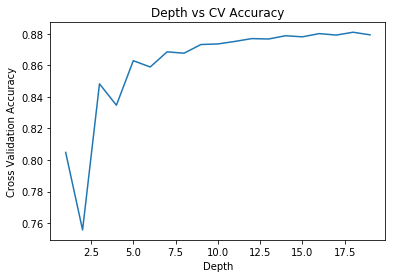

In [112]:
mp.plot(l,cross_validation_scores)
mp.xlabel('Depth')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Accuracy")

Text(0.5,1,'Depth vs CV Error')

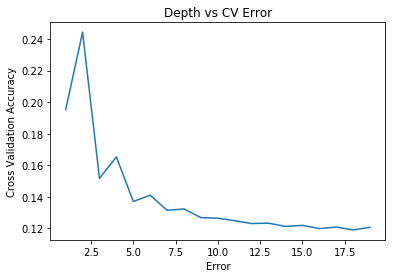

In [113]:
mp.plot(l,error)
mp.xlabel('Error')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Error")

In [114]:
best_d = l[error.index(min(error))]
print("the best value of d is {}".format(best_d))

the best value of d is 18


In [115]:
model = RandomForestClassifier(criterion='gini',n_estimators=best_d)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
score = accuracy_score(ytest,pred)
print(score)


0.8667898715107775


Observation:
    
    Random Forest on Average Word2vec:

        -> The best Number of base learning model is achieved with the help of cross-validation when it is 18
    
        -> The accuracy with 18 base learning models is 86.67

GBDT ON AVERAGE WORD2VEC:

In [117]:
parameters = { 'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'learning_rate':[0.1,0.2,0.3,0.4,0.5]}

In [118]:
classifier = GradientBoostingClassifier()

In [25]:
from sklearn.model_selection import GridSearchCV

In [120]:
model = GridSearchCV(classifier,param_grid=parameters,n_jobs=-1,cv=3,scoring='accuracy')
model.fit(xtrain,ytrain)
print(model.best_estimator_)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [122]:
classifier = GradientBoostingClassifier(learning_rate=0.5,n_estimators=20)
classifier.fit(xtrain,ytrain)
pred = classifier.predict(xtest)
score  = accuracy_score(ytest,pred)
print(score)

0.8739894721168753


Observation:
    
    GBDT on Average Word2vec:

        -> By performing grid search the best parameters were:
            
                                    -> Number of baseline models = 20
                
                                    -> Learning rate = 0.5
                    
        -> Model with the best hyper parameters has given an accurancy of 87.39

STACKING ON AVERAGE WORD2VEC:

In [33]:
cross_validation_scores = []
for d in l:
    model = DecisionTreeClassifier(criterion='gini',max_depth=d, min_samples_split=10)
    score = cross_val_score(model,xtrain,ytrain,cv=3,scoring='accuracy')
    cross_validation_scores.append(score.mean())

In [34]:
error = [1 - x for x in cross_validation_scores]
print(error)
print(cross_validation_scores)

[0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.1420880048502261, 0.1402120039219784, 0.13879200846583306, 0.13720401608169075, 0.1369680067375857, 0.13882399131369993, 0.14072399281795522, 0.1450480132346721, 0.14893999976306238, 0.15308800123560518, 0.15749999982815865, 0.1613440081487173, 0.16448001771719511, 0.1667120169494748, 0.16950801157378959, 0.17139201935009307]
[0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8579119951497739, 0.8597879960780216, 0.8612079915341669, 0.8627959839183093, 0.8630319932624143, 0.8611760086863001, 0.8592760071820448, 0.8549519867653279, 0.8510600002369376, 0.8469119987643948, 0.8425000001718413, 0.8386559918512827, 0.8355199822828049, 0.8332879830505252, 0.8304919884262104, 0.8286079806499069]


Text(0.5,1,'Depth vs CV Accuracy')

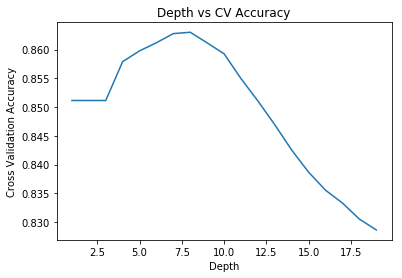

In [35]:
mp.plot(l,cross_validation_scores)
mp.xlabel('Depth')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Accuracy")

Text(0.5,1,'Depth vs CV Error')

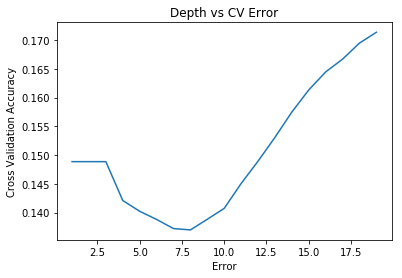

In [36]:
mp.plot(l,error)
mp.xlabel('Error')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Error")

In [37]:
best_d = l[error.index(min(error))]
print("the best value of d is {}".format(best_d))

the best value of d is 8


Note:
    
    -> In stacking all the models are perfect models which means they do not overfit or underfit
    
    -> The decision tree with depth 8 is the perfect model
    
    -> From above we have the best models hyper parameters for Random forest and GBDT

In [38]:
moedl1 = DecisionTreeClassifier(max_depth=8,criterion='gini')
model2 = RandomForestClassifier(criterion='gini',n_estimators=18)
model3 = GradientBoostingClassifier(learning_rate=0.5,n_estimators=20)

In [39]:
clf = StackingClassifier(classifiers=[moedl1,model2],meta_classifier=model3)

In [43]:
clf.fit(xtrain,ytrain)
pred = clf.predict(xtest)
score = accuracy_score(ytest,pred)
print(score)

91.37

TFIDF WORD2VEC:

    -> Here i am using the word2vec model to construct vector representation of each sentence

In [45]:
data = finaldata.sort_values("Time",axis=0,ascending=True,kind='quicksort',na_position='last',inplace=False)

In [46]:
data.shape

(364173, 10)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
tfid = TfidfVectorizer(ngram_range=(1,2))

In [49]:
tfid_vect = tfid.fit_transform(data['Text'].values)

In [50]:
tfid_vect.shape

(364173, 2910206)

In [51]:
tfidf_feat = tfid.get_feature_names() 
print(len(tfidf_feat))

2910206


In [52]:
tfidf_feat = tfid.get_feature_names() 
tfidf_sent_vectors = [];
row=0;
for sent in sentences_list: 
    sent_vec = np.zeros(200) 
    sum =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            tfidf = tfid_vect[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            sum += tf_idf
        except:
            pass
    sent_vec /= sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

/Users/vthumati/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [53]:
print(len(tfidf_sent_vectors))
print(len(tfidf_sent_vectors[300000]))

364173
200


In [54]:
type(tfidf_sent_vectors)

list

In [55]:
tfidf_sent_vectors = np.nan_to_num(tfidf_sent_vectors)

In [56]:
np.isnan(tfidf_sent_vectors).any()

False

In [57]:
xtrain = tfidf_sent_vectors[0:250000]
xtest = tfidf_sent_vectors[250000:]
ytrain = data['Score'][0:250000]
ytest = data['Score'][250000:]

In [58]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(250000, 200)
(114173, 200)
(250000,)
(114173,)


RANDOM FOREST ON TFIDF WORD2VEC:

In [59]:
from sklearn.cross_validation import cross_val_score

In [61]:
cross_validation_scores = []
for d in l:
    model = RandomForestClassifier(n_estimators=d,n_jobs=-1,criterion='gini',max_depth=None)
    score = cross_val_score(model,xtrain,ytrain,cv=3,scoring='accuracy')
    cross_validation_scores.append(score.mean())

In [62]:
error = [1 - x for x in cross_validation_scores]
print(error)
print(cross_validation_scores)

[0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316, 0.14885599995505316]
[0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468, 0.8511440000449468]


Text(0.5,1,'Depth vs CV Accuracy')

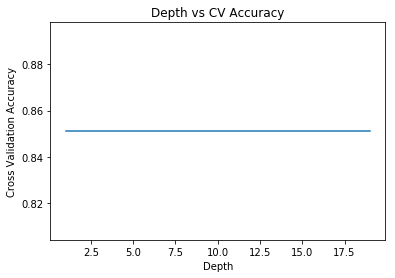

In [63]:
mp.plot(l,cross_validation_scores)
mp.xlabel('Depth')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Accuracy")

Text(0.5,1,'Depth vs CV Error')

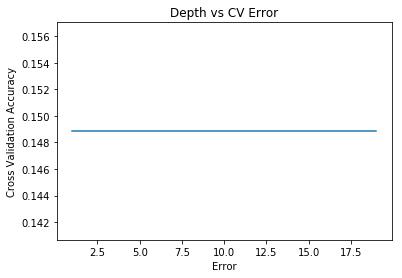

In [64]:
mp.plot(l,error)
mp.xlabel('Error')
mp.ylabel('Cross Validation Accuracy')
mp.title("Depth vs CV Error")

In [65]:
best_d = l[error.index(min(error))]
print("the best value of d is {}".format(best_d))

the best value of d is 1


In [66]:
model = RandomForestClassifier(criterion='gini',n_estimators=best_d)
model.fit(xtrain,ytrain)
pred = model.predict(xtest)
score = accuracy_score(ytest,pred)
print(score)


0.8257381342348892


Observation:
    
    Random Forest on TFIDF Word2vec:

        -> The best Number of base learning model is achieved with the help of cross-validation when 1
    
        -> The accuracy with 18 base learning models is 82.57

GBDT ON TFIDF WORD2VEC:

In [68]:
parameters = { 'n_estimators':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],'learning_rate':[0.1,0.2,0.3,0.4,0.5]}

In [70]:
from sklearn.model_selection import GridSearchCV
classifier = GradientBoostingClassifier()
model = GridSearchCV(classifier,param_grid=parameters,n_jobs=-1,cv=3,scoring='accuracy')
model.fit(xtrain,ytrain)
print(model.best_estimator_)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)


In [74]:
classifier = GradientBoostingClassifier(learning_rate=0.1,n_estimators=1)
classifier.fit(xtrain,ytrain)
pred = classifier.predict(xtest)
score  = accuracy_score(ytest,pred)
print(score)

0.8257381342348892


Observation:
    
    GBDT on TFIDF Word2vec:

        -> By performing grid search the best parameters were:
            
                                    -> Number of baseline models = 1
                
                                    -> Learning rate = 0.1
                    
        -> Model with the best hyper parameters has given an accurancy of 82.57

CONCLUSION:
    
    AVERAGE WORD2VEC:
    
        RANDOM FOREST:
        
            -> IN RANDOM FOREST THE BASE MODELS WERE HAVING LOW BIAS AND HIGH VARIANCE, DUE TO ITS DEPTH
            
            -> THIS IS CONTROLLED BY ROW SAMPLING, COLUMN SAMPLING AND BOOTSTRAP AGGREGATION
            
            -> THE BEST NUMBER OF BASE LEARNING MODEL IS ACHIEVED WITH THE HELP OF CROSS-VALIDATION WHEN IT IS 18
            
            -> THE ACCURACY WITH 18 BASE LEARNING MODELS IS 86.67
            
        GBDT:
        
            -> IN GBDT THE BASE MODELS WERE HAVING HIGH BIAS AND LOW VARIANCE, DUE TO LESS DEPTH OF TREES
            
            -> THIS IS CONTROLLED BY PSEDUO RESIDUAL ERRORS
            
            -> BY PERFORMING GRID SEARCH THE BEST PARAMETERS WERE:
            
                                    -> NUMBER OF BASELINE MODELS = 20
                
                                    -> LEARNING RATE = 0.5
                    
            -> MODEL WITH THE BEST HYPER PARAMETERS HAS GIVEN AN ACCURACY OF 87.39
            
         STACKING:
        
              -> IN STACKING ALL THE MODELS ARE PERFECT MODELS WHICH MEANS THEY DO NOT OVERFIT OR UNDERFIT

              -> THE DECISION TREE WITH DEPTH 8 IS THE PERFECT MODEL
              
              -> RANDOM FOREST WITH NUMBER OF BASE LEARNERS = 18 IS THE BEST MODEL
              
              -> GBDT WITH NUMBER OF BASELINE MODELS = 20 AND LEARNING RATE = 0.5 IS THE BEST MODEL
              
              -> USING GBDT AS META-CLASSIFIER AND RANDOM FOREST, DECISION TREES AS CLASSIFIER THE ACCURANCY IS 91.37
              
    
    TFIDF WORD2VEC:
    
        
          RANDOM FOREST:
          
             -> THE BEST NUMBER OF BASE LEARNING MODEL IS ACHIEVED WITH THE HELP OF CROSS-VALIDATION WHEN 1

             -> THE ACCURACY WITH 18 BASE LEARNING MODELS IS 82.57
             
          GBDT:
          
             -> BY PERFORMING GRID SEARCH THE BEST PARAMETERS WERE:

                                -> NUMBER OF BASELINE MODELS = 1

                                -> LEARNING RATE = 0.1

            -> MODEL WITH THE BEST HYPER PARAMETERS HAS GIVEN AN ACCURACY OF 82.57
            
            
            
         
        
        